In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback

from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta

In [ ]:
numbers= tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = numbers.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


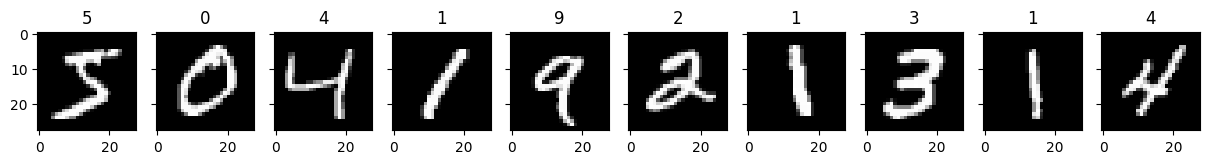

In [ ]:
fig, axs= plt.subplots(1, 10, figsize=(15, 20), sharey=True)
for i in range(10):
  axs[i].imshow(X_train[i], cmap='gray')
  axs[i].set_title(y_train[i])
plt.show()

<ipython-input-4-0b5c5c03fe80>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(dict(zip(unique, counts)), palette= 'rocket', ax=axs[0])
<ipython-input-4-0b5c5c03fe80>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(dict(zip(unique, counts)), palette= 'rocket', ax=axs[1])


<Axes: >

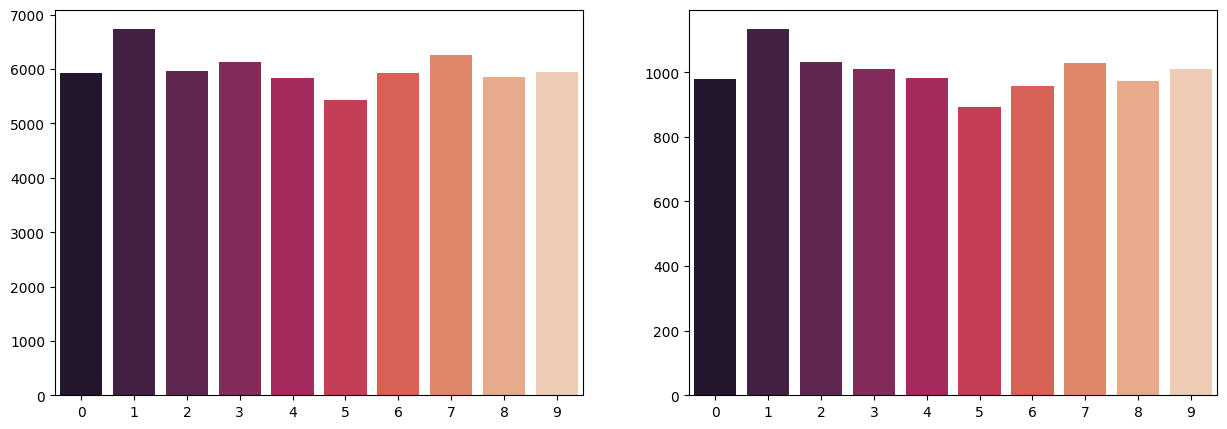

In [ ]:
fig, axs= plt.subplots(1, 2, figsize=(15, 5))
unique, counts = np.unique(y_train, return_counts=True)
sns.barplot(dict(zip(unique, counts)), palette= 'rocket', ax=axs[0])

unique, counts = np.unique(y_test, return_counts=True)
sns.barplot(dict(zip(unique, counts)), palette= 'rocket', ax=axs[1])

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X_test, y_test, stratify=y_test, random_state=42, test_size=0.2)

In [ ]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
print(X_train.shape)

(60000, 28, 28)


In [ ]:
def create_model(optimizer, learning_rate):
  model= Sequential()
  model.add(Flatten(input_shape= X_train[0].shape))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer= optimizer(learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
def display_plots(histories):
  fig, axes = plt.subplots(20, 2, figsize=(12, 75))
  axes = axes.ravel()


  for i, (config, history) in enumerate(histories.items()):
    axes[2 * i].plot(history.history['loss'], label='Train Loss')
    axes[2 * i].plot(history.history['val_loss'], label='Validation Loss')
    axes[2 * i].set_title(f'{config} - Loss')
    axes[2 * i].set_xlabel('Epochs')
    axes[2 * i].set_ylabel('Loss')
    axes[2 * i].legend()
    axes[2 * i].grid(True)

    if 'accuracy' in history.history:
        axes[2 * i + 1].plot(history.history['accuracy'], label='Train Accuracy')
        axes[2 * i + 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
        axes[2 * i + 1].set_title(f'{config} - Accuracy')
        axes[2 * i + 1].set_xlabel('Epochs')
        axes[2 * i + 1].set_ylabel('Accuracy')
        axes[2 * i + 1].legend()
        axes[2 * i + 1].grid(True)

  plt.tight_layout()
  plt.show()

In [ ]:
class WeightsHistory(Callback):
    def __init__(self):
        super().__init__()
        self.weights_history = []

    def on_epoch_end(self, epoch, logs=None):
        self.weights_history.append(self.model.get_weights())

In [ ]:
def plot_weights(wlist):
  plt.figure(figsize=(10, 5))

  for i in range(len(wlist[5][0])):
    plt.plot(
        range(len(wlist)),
        [weights[5][i] if i < len(weights[5]) else None for weights in wlist],
        label=f'Weight {i}'
    )

  plt.title('Weights Evolution During Training')
  plt.xlabel('Epochs')
  plt.ylabel('Weights Value')
  plt.grid()
  plt.show()

# SGD

In [ ]:
learning_rate=[0.0001,0.001, 0.01, 0.1]
batch_size=[16, 32, 48, 128, 256]
histories= {}
weights_history = WeightsHistory()
weights_list1={}
best_accuracy=0
best_model=None

monitor= EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
for lr in learning_rate:
  for bs in batch_size:
    model= create_model(SGD, lr)
    history=model.fit(X_train_s, y_train_s, epochs=100, validation_split=0.16, batch_size = bs, callbacks=[monitor, weights_history])

    histories[f"learning_rate = {lr}/batch_size = {bs}"] = history

    _, accuracy= model.evaluate(X_test_s, y_test_s, verbose=0)

    if accuracy > best_accuracy:
      best_accuracy= accuracy
      best_model= model
      weights_list1 = weights_history.weights_history

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5340 - loss: 18.9506 - val_accuracy: 0.7992 - val_loss: 3.9323
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8349 - loss: 2.7462 - val_accuracy: 0.8328 - val_loss: 2.8399
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8688 - loss: 1.6733 - val_accuracy: 0.8398 - val_loss: 2.3624
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9067 - loss: 1.1186 - val_accuracy: 0.8586 - val_loss: 2.2441
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9200 - loss: 0.8543 - val_accuracy: 0.8648 - val_loss: 2.1224
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9351 - loss: 0.5804 - val_accuracy: 0.8734 - val_loss: 1.9345
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9432 - loss: 0.4301 - val_accuracy: 0.8734 - val_loss: 1.8363
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9591 - loss: 0.2844 - val_acc

In [ ]:
_, accuracy_best= best_model.evaluate(X_test_s, y_test_s, verbose=0)
print(accuracy_best)

0.8999999761581421


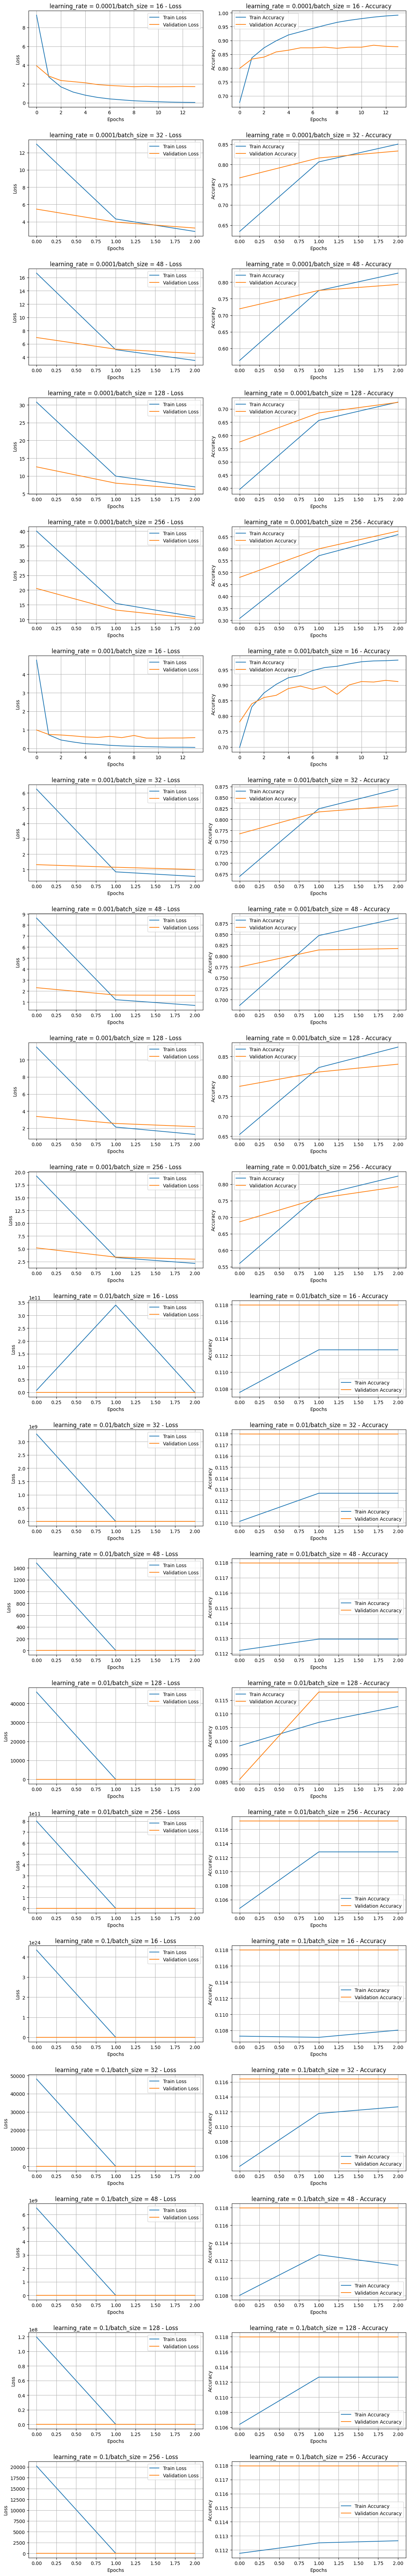

In [ ]:
display_plots(histories)

# Adam

In [ ]:
histories_adam= {}
weights_history_adam = WeightsHistory()
weights_list_adam={}

best_accuracy_adam=0
best_model_adam=None

monitor_adam= EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
for lr in learning_rate:
  for bs in batch_size:
    model= create_model(Adam, lr)
    history=model.fit(X_train_s, y_train_s, epochs=100, validation_split=0.16, batch_size = bs, callbacks=[monitor_adam, weights_history_adam])
    histories_adam[f"learning_rate = {lr}/batch_size = {bs}"]= history

    _, accuracy= model.evaluate(X_test_s, y_test_s, verbose=0)

    if accuracy > best_accuracy_adam:
      best_accuracy_adam= accuracy
      best_model_adam= model
      weights_list_adam = weights_history_adam.weights_history

Epoch 1/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4222 - loss: 34.9140 - val_accuracy: 0.7492 - val_loss: 6.4620
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7999 - loss: 4.4213 - val_accuracy: 0.8156 - val_loss: 4.0304
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8791 - loss: 2.0086 - val_accuracy: 0.8313 - val_loss: 3.3406
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9110 - loss: 1.2137 - val_accuracy: 0.8531 - val_loss: 2.9790
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9386 - loss: 0.7235 - val_accuracy: 0.8609 - val_loss: 2.5873
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9487 - loss: 0.4488 - val_accuracy: 0.8625 - val_loss: 2.5455
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9683 - loss: 0.2656 - val_accuracy: 0.8570 - val_loss: 2.4144
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9731 - loss: 0.2134 - val_acc

In [ ]:
_, accuracy_best_adam= best_model_adam.evaluate(X_test_s, y_test_s, verbose=0)
print(accuracy_best_adam)

0.9075000286102295


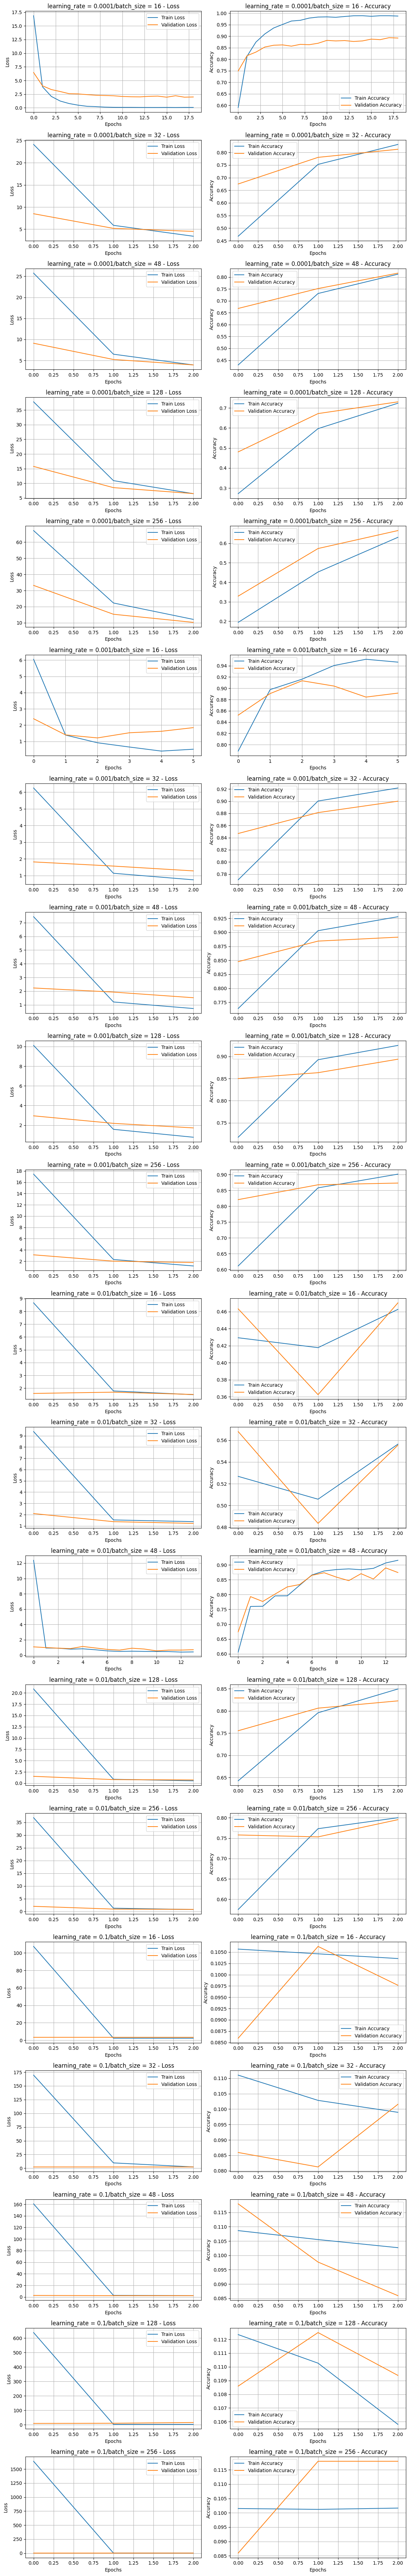

In [ ]:
display_plots(histories_adam)

# Adagrad

In [ ]:
histories_adagrad= {}
weights_history_adagrad = WeightsHistory()
weights_list_adagrad ={}

best_accuracy_adagrad=0
best_model_adagrad=None

monitor_adagrad= EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
for lr in learning_rate:
  for bs in batch_size:
    model= create_model(Adagrad, lr)
    history=model.fit(X_train_s, y_train_s, epochs=100, validation_split=0.16, batch_size = bs, callbacks=[monitor_adagrad, weights_history_adagrad])
    histories_adagrad[f"learning_rate = {lr}/batch_size = {bs}"]= history

    _, accuracy= model.evaluate(X_test_s, y_test_s, verbose=0)

    if accuracy > best_accuracy_adagrad:
      best_accuracy_adagrad= accuracy
      best_model_adagrad= model
      weights_list_adagrad = weights_history_adagrad.weights_history

Epoch 1/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2096 - loss: 57.5995 - val_accuracy: 0.2906 - val_loss: 32.9542
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3222 - loss: 29.1170 - val_accuracy: 0.3555 - val_loss: 25.2630
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3900 - loss: 23.2736 - val_accuracy: 0.4156 - val_loss: 21.4461
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4391 - loss: 19.3214 - val_accuracy: 0.4531 - val_loss: 19.1093
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4716 - loss: 17.1721 - val_accuracy: 0.4852 - val_loss: 17.4939
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4947 - loss: 15.9892 - val_accuracy: 0.5094 - val_loss: 16.2845
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5209 - loss: 15.0338 - val_accuracy: 0.5281 - val_loss: 15.3312
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5520 - loss: 13.

In [ ]:
_, accuracy_best_adagrad= best_model_adagrad.evaluate(X_test_s, y_test_s, verbose=0)
print(accuracy_best_adagrad)

0.8884999752044678


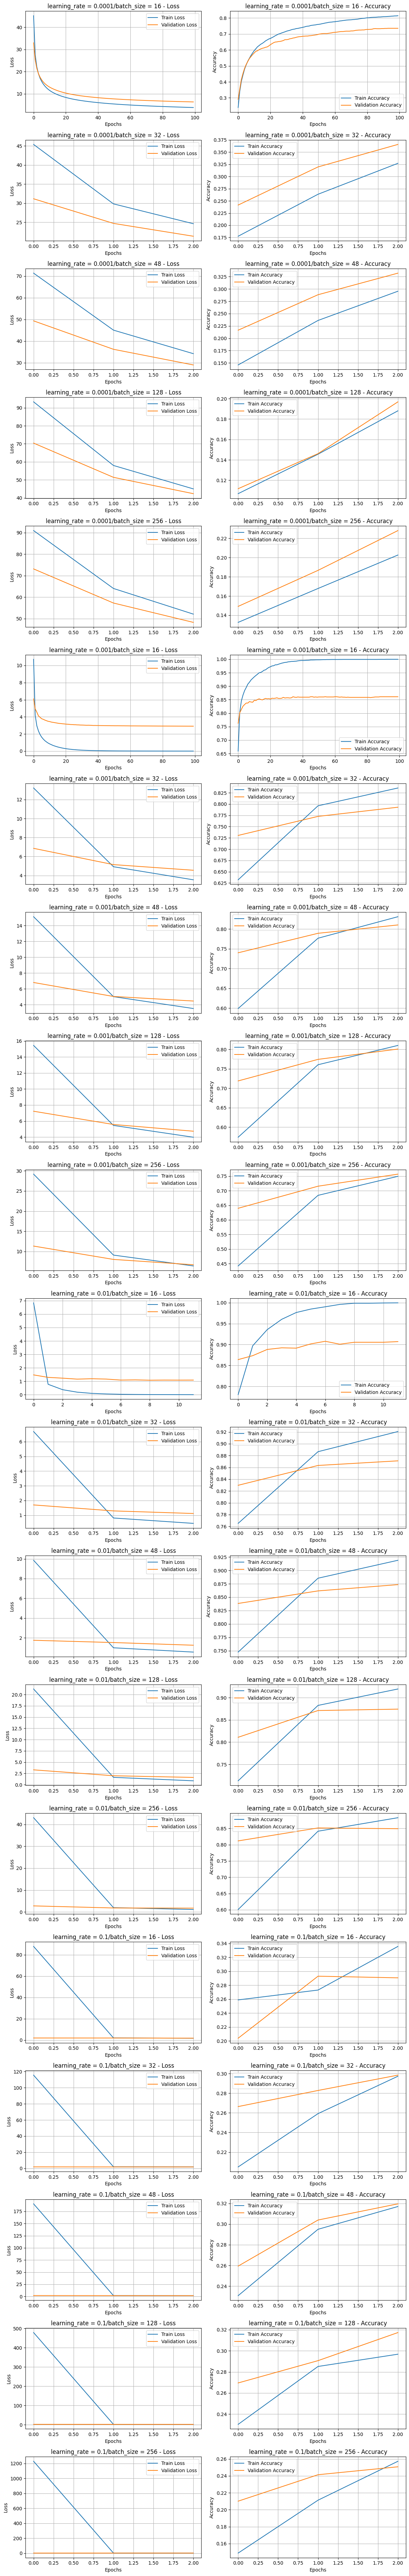

In [ ]:
display_plots(histories_adagrad)

# RMSprop

In [ ]:
histories_rmsprop= {}
weights_history_rmsprop = WeightsHistory()
weights_list_rmsprop ={}

best_accuracy_rmsprop=0
best_model_rmsprop=None

monitor_rmsprop= EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
for lr in learning_rate:
  for bs in batch_size:
    model= create_model(RMSprop, lr)
    history=model.fit(X_train_s, y_train_s, epochs=100, validation_split=0.16, batch_size = bs, callbacks=[monitor_rmsprop, weights_history_rmsprop])
    histories_rmsprop[f"learning_rate = {lr}/batch_size = {bs}"]= history

    _, accuracy= model.evaluate(X_test_s, y_test_s, verbose=0)

    if accuracy > best_accuracy_rmsprop:
      best_accuracy_rmsprop= accuracy
      best_model_rmsprop= model
      weights_list_rmsprop = weights_history_rmsprop.weights_history

Epoch 1/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4495 - loss: 27.3063 - val_accuracy: 0.7789 - val_loss: 5.0884
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8200 - loss: 3.8586 - val_accuracy: 0.8453 - val_loss: 3.5893
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8949 - loss: 1.9486 - val_accuracy: 0.8641 - val_loss: 3.0429
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9183 - loss: 1.2528 - val_accuracy: 0.8672 - val_loss: 2.7914
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9310 - loss: 0.9733 - val_accuracy: 0.8828 - val_loss: 2.3183
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9567 - loss: 0.5567 - val_accuracy: 0.8805 - val_loss: 2.4564
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9662 - loss: 0.3434 - val_accuracy: 0.8680 - val_loss: 2.5626
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9729 - loss: 0.2233 - val_acc

In [ ]:
_, accuracy_best_rmsprop= best_model_rmsprop.evaluate(X_test_s, y_test_s, verbose=0)
print(accuracy_best_rmsprop)

0.9235000014305115


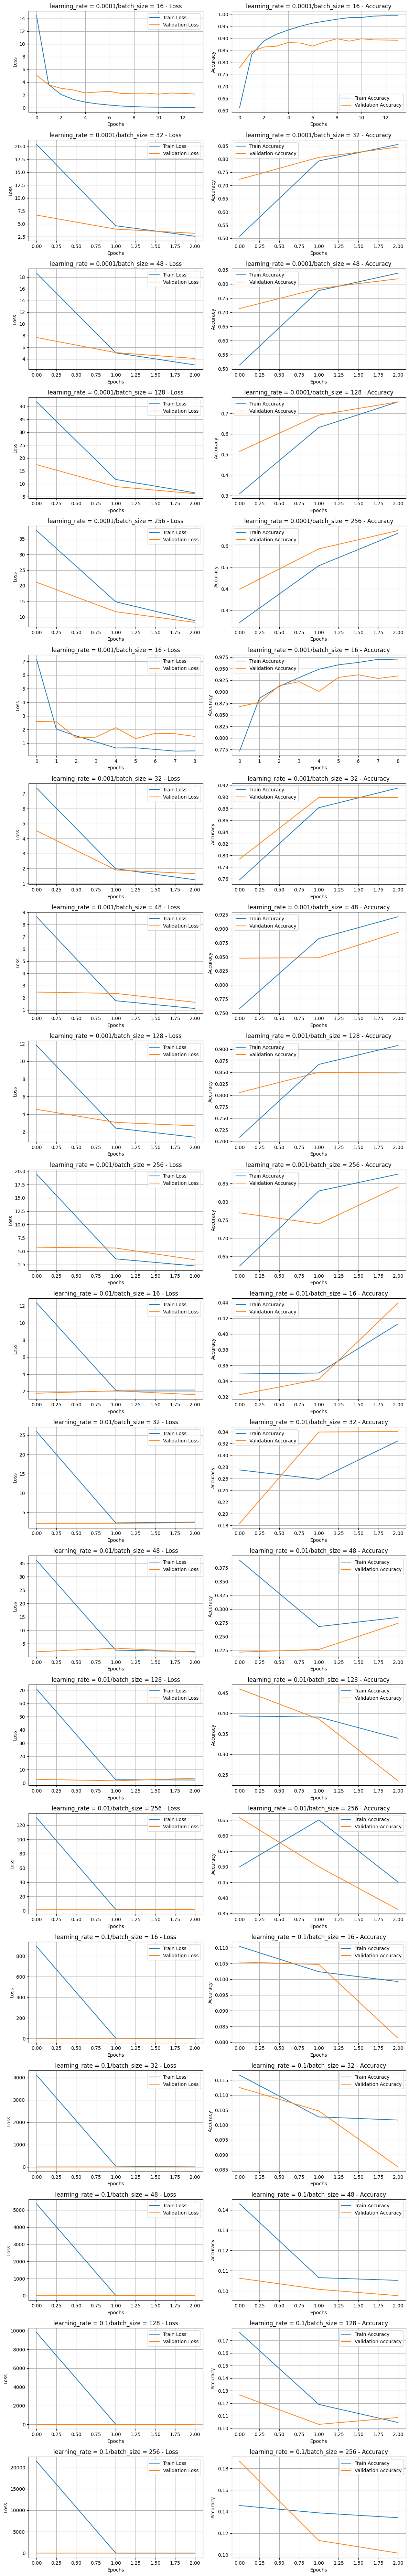

In [ ]:
display_plots(histories_rmsprop)

# Adadelta

In [ ]:
histories_adadelta= {}
weights_history_adadelta = WeightsHistory()
weights_list_adadelta ={}

best_accuracy_adadelta=0
best_model_adadelta=None

monitor_adadelta= EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
for lr in learning_rate:
  for bs in batch_size:
    model= create_model(Adadelta, lr)
    history=model.fit(X_train_s, y_train_s, epochs=100, validation_split=0.16, batch_size = bs, callbacks=[monitor_adadelta, weights_history_adadelta])
    histories_adadelta[f"learning_rate = {lr}/batch_size = {bs}"]= history

    _, accuracy= model.evaluate(X_test_s, y_test_s, verbose=0)

    if accuracy > best_accuracy_adadelta:
      best_accuracy_adadelta= accuracy
      best_model_adadelta= model
      weights_list_adadelta = weights_history_adadelta.weights_history

Epoch 1/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0889 - loss: 127.6072 - val_accuracy: 0.1008 - val_loss: 122.5656
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0915 - loss: 123.8895 - val_accuracy: 0.1016 - val_loss: 120.4700
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0910 - loss: 122.8446 - val_accuracy: 0.1008 - val_loss: 118.4292
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0878 - loss: 120.4474 - val_accuracy: 0.1016 - val_loss: 116.4368
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0953 - loss: 120.4761 - val_accuracy: 0.1023 - val_loss: 114.4958
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0904 - loss: 115.7021 - val_accuracy: 0.1031 - val_loss: 112.5993
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0888 - loss: 114.4585 - val_accuracy: 0.1039 - val_loss: 110.7488
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.09

In [ ]:
_, accuracy_best_adadelta= best_model_adadelta.evaluate(X_test_s, y_test_s, verbose=0)
print(accuracy_best_adadelta)

0.8399999737739563


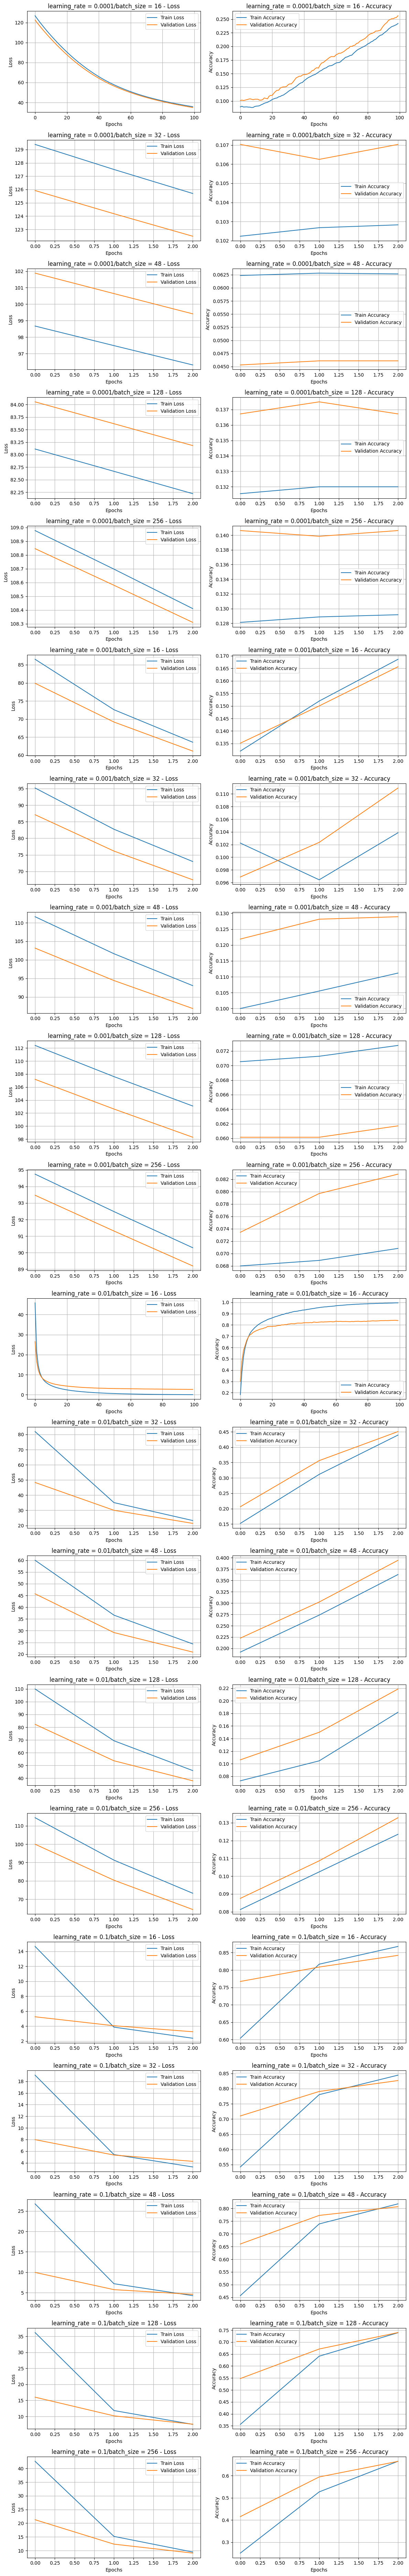

In [ ]:
display_plots(histories_adadelta)

# Відображення ваг

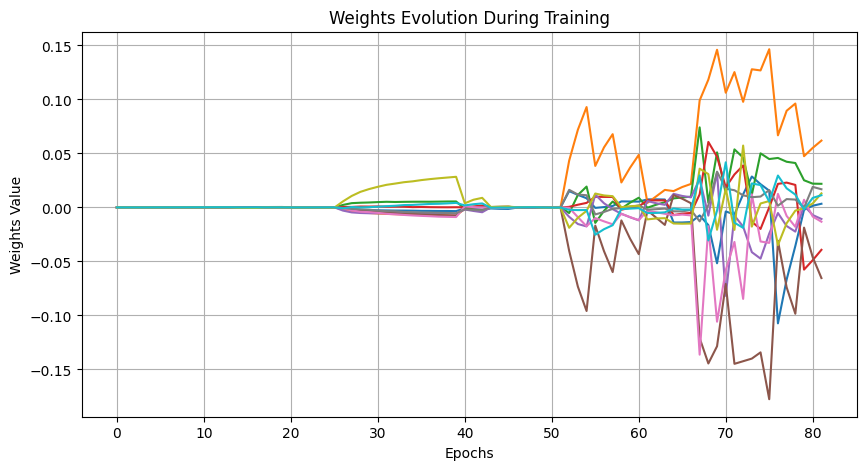

In [ ]:
plot_weights(weights_list1)

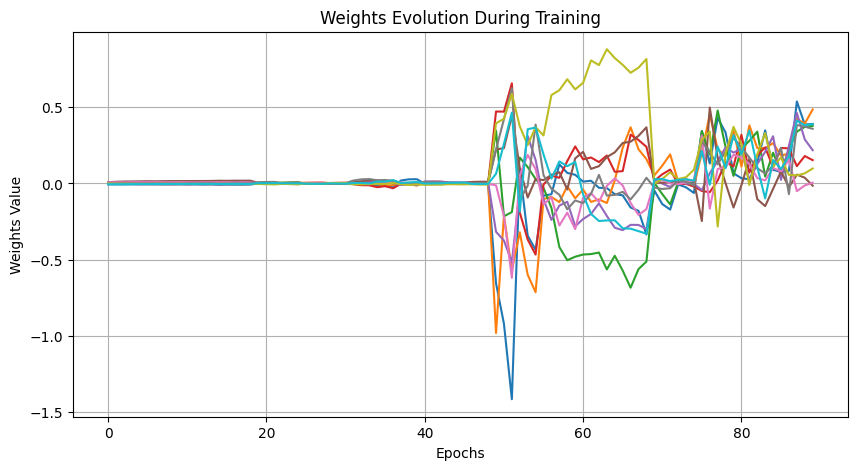

In [ ]:
plot_weights(weights_list_adam)

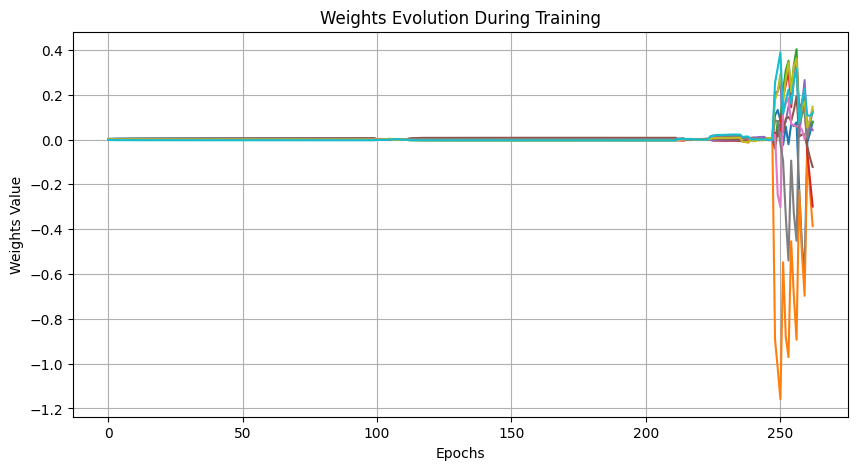

In [ ]:
plot_weights(weights_list_adagrad)

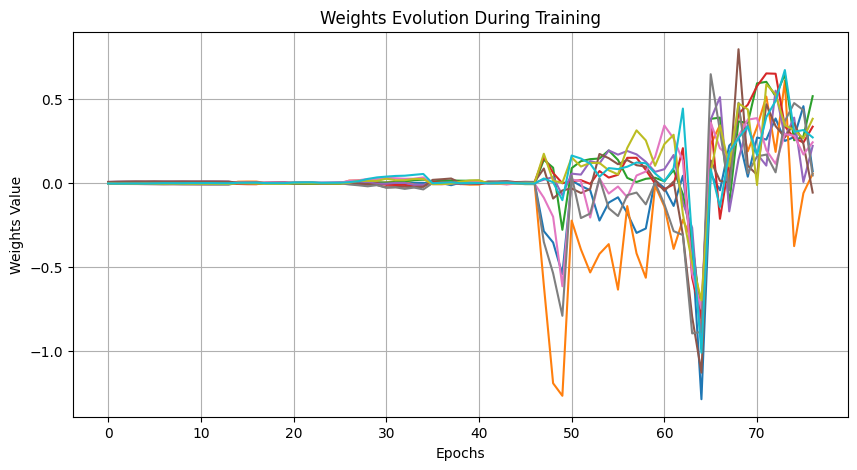

In [ ]:
plot_weights(weights_list_rmsprop)

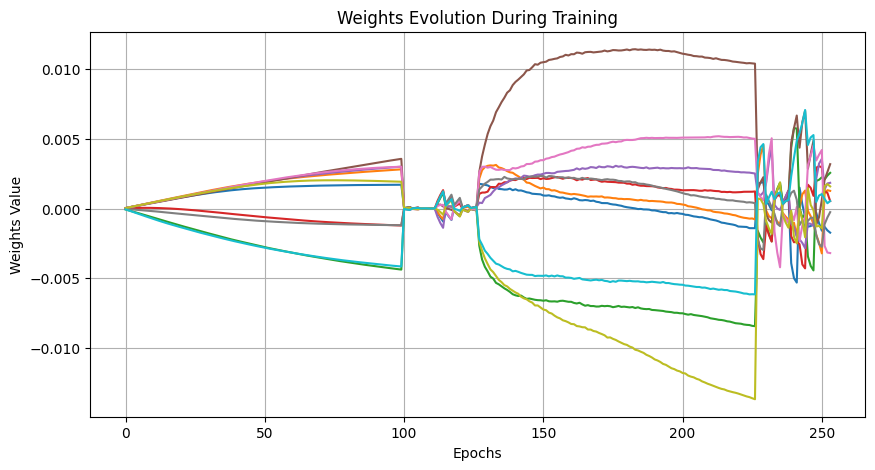

In [ ]:
plot_weights(weights_list_adadelta)